In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
df=pd.read_csv("C://Users//HP//Downloads//output_data.csv")
df

,Timestamp,DeviceID,OC,OT,PC
0,1717180257962,e77b973a-b7c9-4113-8598-4e85be9a8b34,763,1878,2093
1,1717180333401,19083212-f248-48f5-b7c2-1902d366da74,1682,2286,2756
2,1717180333482,26fef3fe-5c95-49b3-aff3-737124c6244b,2967,2292,4403
3,1717180901692,db18c473-1dc3-4d2a-b6b9-60db12b71009,1634,2478,2163
4,1717180909510,6aa15284-a078-4f25-b1b9-7045ce071b47,1951,2300,2778
...,...,...,...,...,...
56341,1722449268069,19083212-f248-48f5-b7c2-1902d366da74,1612,2276,2821
56342,1722449885930,26fef3fe-5c95-49b3-aff3-737124c6244b,2681,2312,4321
56343,1722449885934,19083212-f248-48f5-b7c2-1902d366da74,1562,2296,2762
56344,1722450212536,db18c473-1dc3-4d2a-b6b9-60db12b71009,1494,2076,2478


In [3]:

df1=df.drop("OT",axis=1)
df1.describe()

,Timestamp,OC,PC
count,5.634600e+04,5.634600e+04,5.634600e+04
mean,1.719787e+12,3.925110e+04,5.941779e+04
std,1.513437e+09,7.914835e+05,9.673352e+05
min,1.717180e+12,0.000000e+00,0.000000e+00
25%,1.718510e+12,1.646000e+03,2.429000e+03
50%,1.719774e+12,1.849000e+03,2.849000e+03
75%,1.721128e+12,2.142000e+03,3.273000e+03
max,1.722450e+12,1.684091e+07,1.684184e+07


In [4]:
column_list=df1.columns. values. tolist() 
col_list=column_list[2:]
col_list

['OC', 'PC']

In [5]:
# Assuming col_list contains column names you want to filter
for column in col_list:
    if column in df1.columns:
        df1 = df1[df1[column] <= 1e6]  # Update df1 with the filtered result

# After filtering, you can describe the resulting DataFrame
df1.describe()
df1


,Timestamp,DeviceID,OC,PC
0,1717180257962,e77b973a-b7c9-4113-8598-4e85be9a8b34,763,2093
1,1717180333401,19083212-f248-48f5-b7c2-1902d366da74,1682,2756
2,1717180333482,26fef3fe-5c95-49b3-aff3-737124c6244b,2967,4403
3,1717180901692,db18c473-1dc3-4d2a-b6b9-60db12b71009,1634,2163
4,1717180909510,6aa15284-a078-4f25-b1b9-7045ce071b47,1951,2778
...,...,...,...,...
56341,1722449268069,19083212-f248-48f5-b7c2-1902d366da74,1612,2821
56342,1722449885930,26fef3fe-5c95-49b3-aff3-737124c6244b,2681,4321
56343,1722449885934,19083212-f248-48f5-b7c2-1902d366da74,1562,2762
56344,1722450212536,db18c473-1dc3-4d2a-b6b9-60db12b71009,1494,2478


In [6]:
unique_device_ids = df1['DeviceID'].unique().tolist()
unique_device=unique_device_ids[:5]
unique_device

['e77b973a-b7c9-4113-8598-4e85be9a8b34',
 '19083212-f248-48f5-b7c2-1902d366da74',
 '26fef3fe-5c95-49b3-aff3-737124c6244b',
 'db18c473-1dc3-4d2a-b6b9-60db12b71009',
 '6aa15284-a078-4f25-b1b9-7045ce071b47']

In [7]:


def unique_device_data(unique_device: list[str], df1: pd.DataFrame) -> pd.DataFrame:

    filtered_dfs = []
    
    for device_name in unique_device:
        filtered_df = df1[df1["DeviceID"] == device_name]
        filtered_dfs.append(filtered_df)
    
    
    result_df = pd.concat(filtered_dfs, ignore_index=True)
    return result_df

dd = unique_device_data(unique_device, df1)
dd


,Timestamp,DeviceID,OC,PC
0,1717180257962,e77b973a-b7c9-4113-8598-4e85be9a8b34,763,2093
1,1717181014865,e77b973a-b7c9-4113-8598-4e85be9a8b34,1639,2101
2,1717181247921,e77b973a-b7c9-4113-8598-4e85be9a8b34,765,2234
3,1717183812246,e77b973a-b7c9-4113-8598-4e85be9a8b34,1631,2209
4,1717186980733,e77b973a-b7c9-4113-8598-4e85be9a8b34,772,2345
...,...,...,...,...
16417,1722434664390,6aa15284-a078-4f25-b1b9-7045ce071b47,1418,2595
16418,1722437406894,6aa15284-a078-4f25-b1b9-7045ce071b47,1914,2764
16419,1722445700321,6aa15284-a078-4f25-b1b9-7045ce071b47,1219,2603
16420,1722446228709,6aa15284-a078-4f25-b1b9-7045ce071b47,1939,2763


In [8]:
import matplotlib.pyplot as plt
import plotly.express as px

def matplotlib_plot(dd, unique_device):
    plt.figure(figsize=(14, 7))
    for device in unique_device[:5]:  # Assuming you want to limit to first 5 devices
        sub_data_frame = dd[dd["DeviceID"] == device]
        plt.scatter(sub_data_frame["OC"], sub_data_frame["PC"], label=device)
    
    plt.xlabel("OC")
    plt.ylabel("PC")  # Fixed the ylabel to match 'PC'
    plt.title("Scatter plot with OC vs PC")
    plt.legend()
    plt.show()

def plotly_plot(dd):
    fig = px.scatter(
        dd,
        x="OC",
        y="PC",
        color="DeviceID",
        symbol="DeviceID",
        width=1400,
        height=700,
        labels={'x': "OC", 'y': "PC"},
        title="Scatter plot OC vs PC"
    )
    fig.show()


In [9]:
plotly_plot(dd)

In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scalar = MinMaxScaler()

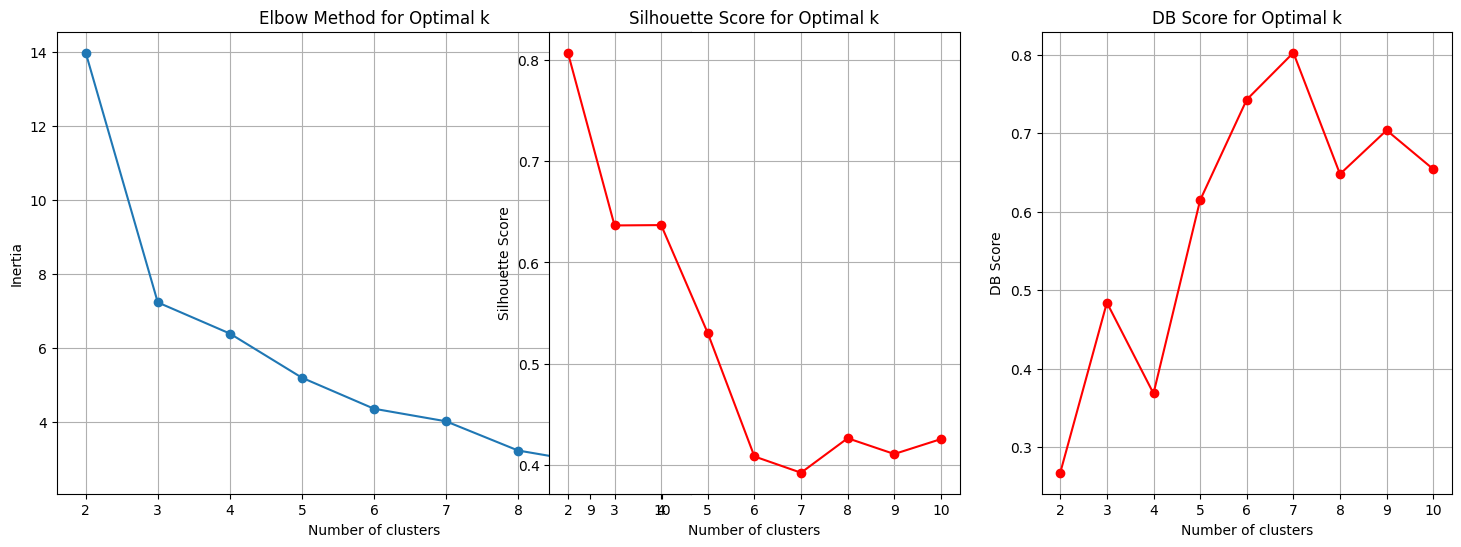

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score
from sklearn.preprocessing import StandardScaler

def k_score(dd: pd.DataFrame, scaler: StandardScaler, data: pd.DataFrame):
    # Initialize lists to store silhouette scores and inertia
    silhouette_scores = []
    inertia_scores = []
    db_scores=[]
    
    # Fit KMeans for k ranging from 2 to 10 (silhouette score is undefined for k=1)
    for k in range(2, 11):
        model = KMeans(n_clusters=k, random_state=42)
        scaled_data = scaler.fit_transform(data)
        model.fit(scaled_data)
        
        # Append inertia (Elbow Method)
        inertia_scores.append(model.inertia_)
        
        # Calculate silhouette score
        score = silhouette_score(scaled_data, model.labels_)
        silhouette_scores.append(score)

        #Calculate davies_bouldin_score
        db_score=davies_bouldin_score(scaled_data,model.labels_)
        db_scores.append(db_score)

    # Plotting the elbow curve (Inertia)
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(range(2, 11), inertia_scores, marker='o')
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.title("Elbow Method for Optimal k")
    plt.grid(True)
    
    # Plotting the silhouette scores
    plt.subplot(1, 3, 2)
    plt.plot(range(2, 11), silhouette_scores, marker='o', color='r')
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score for Optimal k")
    plt.grid(True)

    plt.subplot(1, 3, 3)
    plt.plot(range(2, 11), db_scores, marker='o', color='r')
    plt.xlabel("Number of clusters")
    plt.ylabel("DB Score")
    plt.title("DB Score for Optimal k")
    plt.grid(True)
    
    plt.show()

# Example usage
# Assuming 'dd' is your DataFrame and 'scaler' is an instance of StandardScaler
data_to_cluster = dd[["OC", "PC",]]
k_score(dd, scalar, data_to_cluster)


In [12]:
def make_deviceid_dict(dd: pd.DataFrame, unique_device: list[str]):
    device_list = {}
    for u in range(len(unique_device)):
        # Filter DataFrame by device ID
        filtered_df = dd[dd["DeviceID"] == unique_device[u]]
        # Use the device ID as the key in the dictionary
        device_list[f"device_{u}"] = filtered_df

    return device_list
device_list=make_deviceid_dict(dd, unique_device)
print(device_list.keys())

dict_keys(['device_0', 'device_1', 'device_2', 'device_3', 'device_4'])


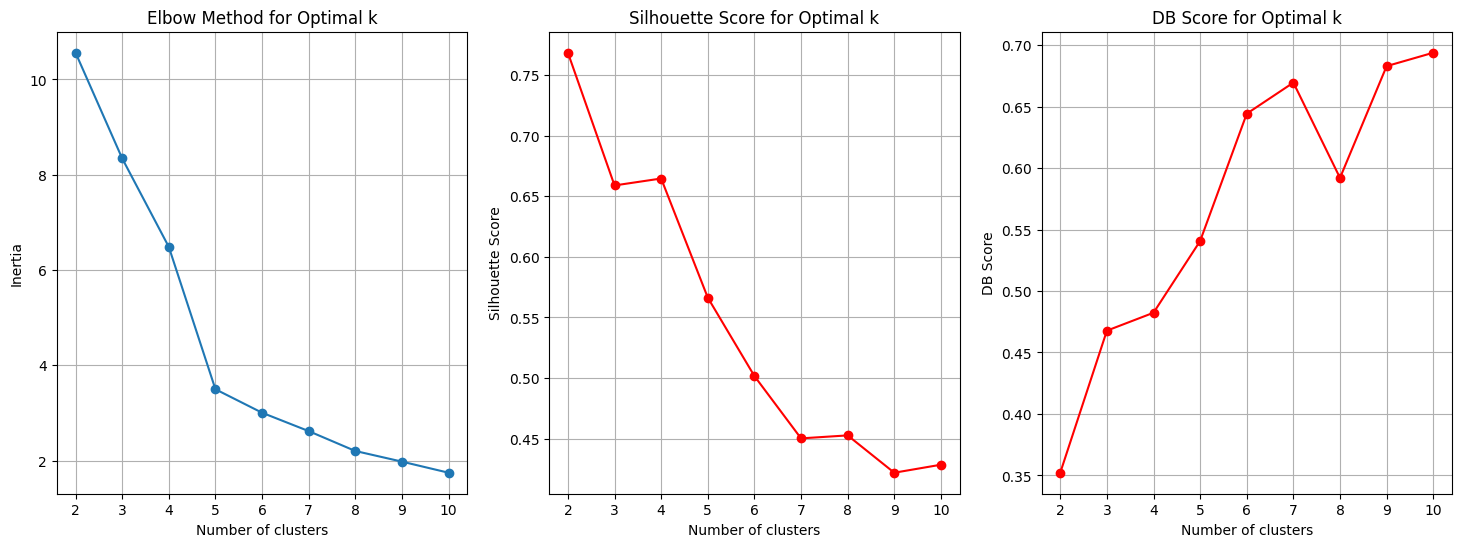

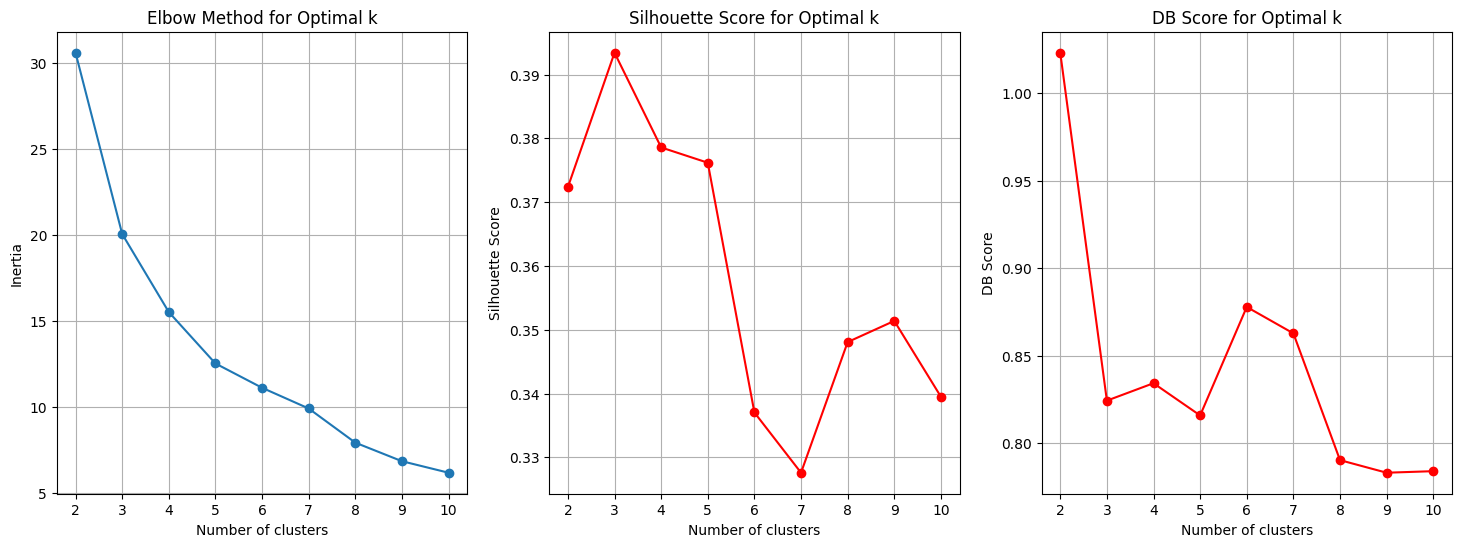

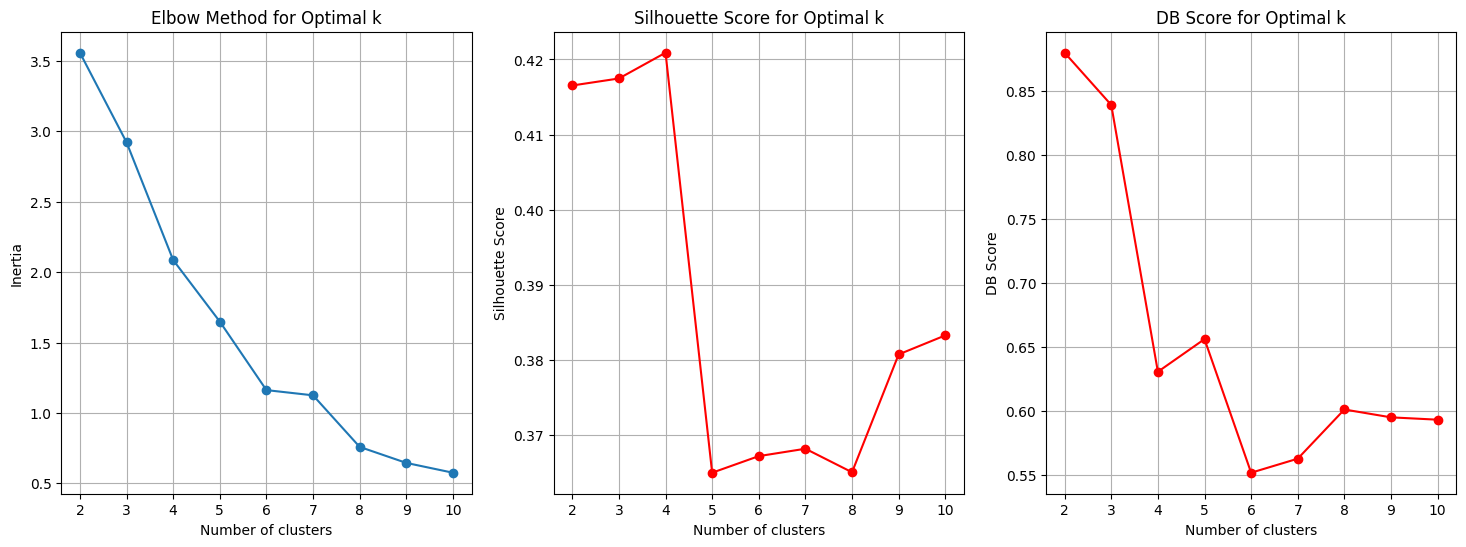

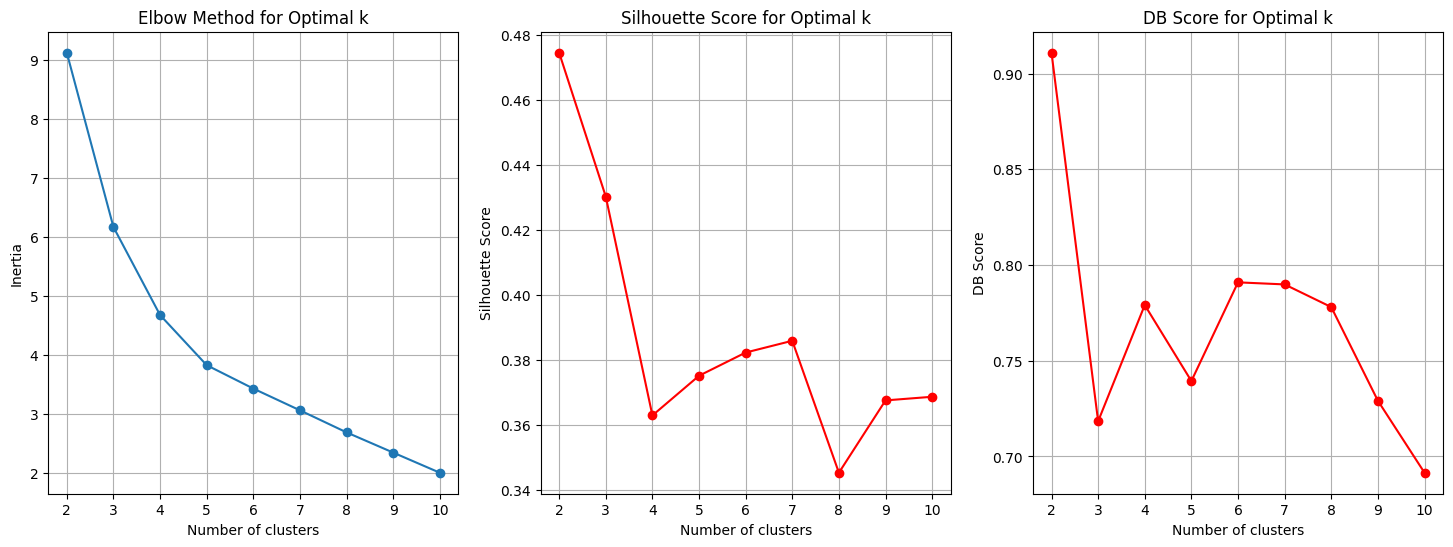

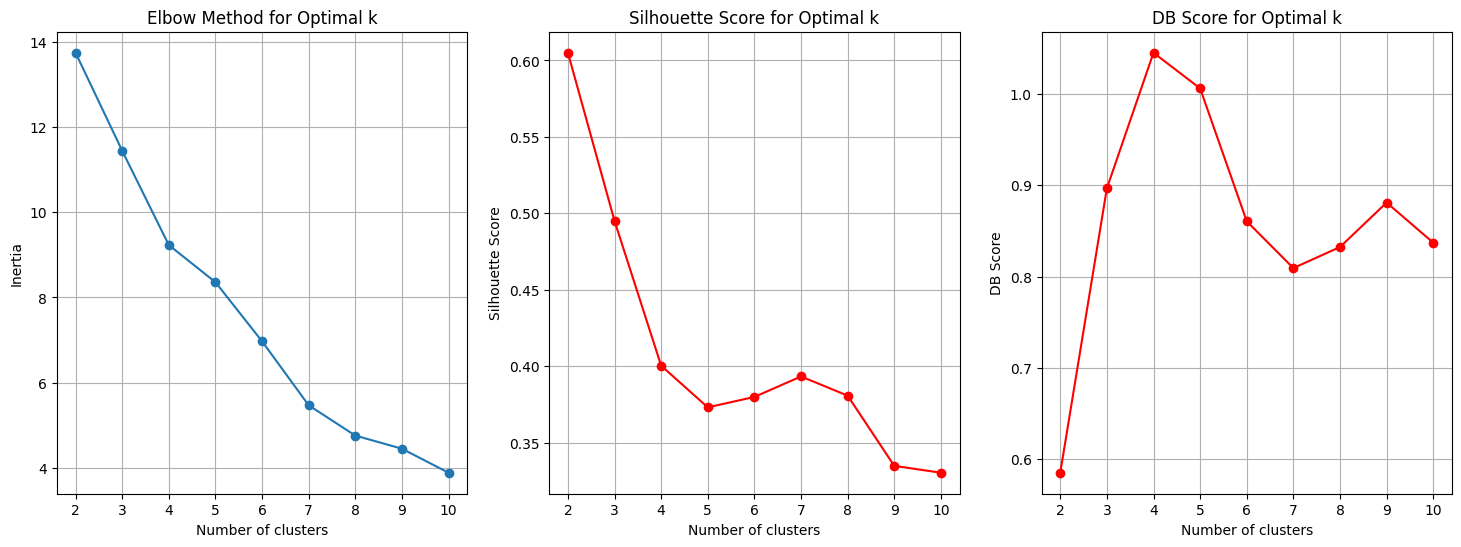

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def k_score(scaler: StandardScaler,device_list:dict):
    scalar = MinMaxScaler()

    for device in device_list.values():
        scalar = scalar.fit(device[["OC","PC"]])
        data=device[["OC","PC"]]
        inertia_scores = []
        silhouette_scores=[]
        db_scores=[]
         
        for k in range(2, 11):
            model = KMeans(n_clusters=k, random_state=42)
            scaled_data = scaler.fit_transform(data)
            model.fit(scaled_data)
            
            # Calculate inertia score
            inertia_scores.append(model.inertia_)
            
            # Calculate silhouette score
            score = silhouette_score(scaled_data, model.labels_)
            silhouette_scores.append(score)
            
            # Calculate db score
            db_score=davies_bouldin_score(scaled_data,model.labels_)
            db_scores.append(db_score)
    

        plt.figure(figsize=(18, 6))
    
        plt.subplot(1, 3, 1)
        plt.plot(range(2, 11), inertia_scores, marker='o')
        plt.xlabel("Number of clusters")
        plt.ylabel("Inertia")
        plt.title("Elbow Method for Optimal k")
        plt.grid(True)
            
        # Plotting the silhouette scores
        plt.subplot(1, 3, 2)
        plt.plot(range(2, 11), silhouette_scores, marker='o', color='r')
        plt.xlabel("Number of clusters")
        plt.ylabel("Silhouette Score")
        plt.title("Silhouette Score for Optimal k")
        plt.grid(True)

        plt.subplot(1, 3, 3)
        plt.plot(range(2, 11), db_scores, marker='o', color='r')
        plt.xlabel("Number of clusters")
        plt.ylabel("DB Score")
        plt.title("DB Score for Optimal k")
        plt.grid(True)
        
        plt.show()
   

# data_to_cluster = dd[["OC", "PC",]]
k_score(scalar,device_list)


K-MEANS FOR FEATURE ["OC","OT","PC]

In [14]:
column_list=df.columns. values. tolist() 
col_list=column_list[2:]
col_list

['OC', 'OT', 'PC']

In [15]:
for column in col_list:
    if column in df.columns:
        df = df[df[column] <= 1e6]  # Update df1 with the filtered result

# After filtering, you can describe the resulting DataFrame
df.describe()
df

,Timestamp,DeviceID,OC,OT,PC
0,1717180257962,e77b973a-b7c9-4113-8598-4e85be9a8b34,763,1878,2093
1,1717180333401,19083212-f248-48f5-b7c2-1902d366da74,1682,2286,2756
2,1717180333482,26fef3fe-5c95-49b3-aff3-737124c6244b,2967,2292,4403
3,1717180901692,db18c473-1dc3-4d2a-b6b9-60db12b71009,1634,2478,2163
4,1717180909510,6aa15284-a078-4f25-b1b9-7045ce071b47,1951,2300,2778
...,...,...,...,...,...
56341,1722449268069,19083212-f248-48f5-b7c2-1902d366da74,1612,2276,2821
56342,1722449885930,26fef3fe-5c95-49b3-aff3-737124c6244b,2681,2312,4321
56343,1722449885934,19083212-f248-48f5-b7c2-1902d366da74,1562,2296,2762
56344,1722450212536,db18c473-1dc3-4d2a-b6b9-60db12b71009,1494,2076,2478


In [16]:
def unique_device_data(unique_device: list[str], df: pd.DataFrame) -> pd.DataFrame:

    filtered_dfs = []
    
    for device_name in unique_device:
        filtered_df = df[df["DeviceID"] == device_name]
        filtered_dfs.append(filtered_df)
    
    
    result_df = pd.concat(filtered_dfs, ignore_index=True)
    return result_df

dd2 = unique_device_data(unique_device, df)
dd2

,Timestamp,DeviceID,OC,OT,PC
0,1717180257962,e77b973a-b7c9-4113-8598-4e85be9a8b34,763,1878,2093
1,1717181014865,e77b973a-b7c9-4113-8598-4e85be9a8b34,1639,2306,2101
2,1717181247921,e77b973a-b7c9-4113-8598-4e85be9a8b34,765,1869,2234
3,1717183812246,e77b973a-b7c9-4113-8598-4e85be9a8b34,1631,2295,2209
4,1717186980733,e77b973a-b7c9-4113-8598-4e85be9a8b34,772,1882,2345
...,...,...,...,...,...
16417,1722434664390,6aa15284-a078-4f25-b1b9-7045ce071b47,1418,2094,2595
16418,1722437406894,6aa15284-a078-4f25-b1b9-7045ce071b47,1914,2088,2764
16419,1722445700321,6aa15284-a078-4f25-b1b9-7045ce071b47,1219,1899,2603
16420,1722446228709,6aa15284-a078-4f25-b1b9-7045ce071b47,1939,2134,2763


In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

def matplotlib_plot(dd, unique_device):
    plt.figure(figsize=(14, 7))
    for device in unique_device[:5]:  # Assuming you want to limit to first 5 devices
        sub_data_frame = dd[dd["DeviceID"] == device]
        plt.scatter(sub_data_frame["OC"], sub_data_frame["PC"], label=device)
    
    plt.xlabel("OC")
    plt.ylabel("PC")  # Fixed the ylabel to match 'PC'
    plt.title("Scatter plot with OC vs PC")
    plt.legend()
    plt.show()

def plotly_plot(dd):
    fig = px.scatter(
        dd,
        x="OC",
        y="PC",
        color="DeviceID",
        symbol="DeviceID",
        width=1400,
        height=700,
        labels={'x': "OC", 'y': "PC"},
        title="Scatter plot OC vs PC"
    )
    fig.show()